In [1]:
import dolfin as dl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nx=10
ny=10
mesh = dl.UnitSquareMesh(nx,nx)

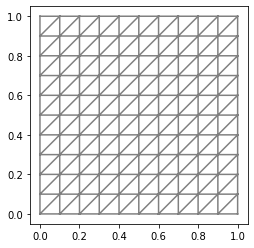

In [3]:
dl.plot(mesh)
plt.show()

In [14]:
cells  = mesh.cells()
coords = np.array(mesh.coordinates())

k=5
print("the kth mesh cell is given by ids", cells[k])
print("these ids can be associated to mesh coordinates")
print("coordinates of said mesh ids are \n", coords[cells[k]])


the kth mesh cell is given by ids [ 2 13 14]
these ids can be associated to mesh coordinates
coordinates of said mesh ids are 
 [[0.2 0. ]
 [0.2 0.1]
 [0.3 0.1]]


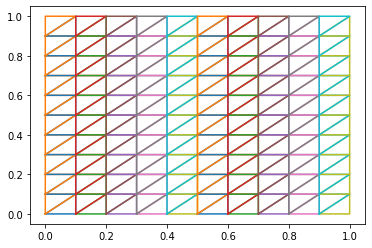

In [5]:
# now I use this information to plot the mesh one triangle element at a time
# for plotting purposes we need [first_vertex, second_vertex, third_vertex, first_vertex]
# in order that the entire triangle is plotted

for cell in cells:
    triangle_x = [coords[c,0] for c in cell]
    triangle_x.append(coords[cell[0],0])
    triangle_y = [coords[c,1] for c in cell]
    triangle_y.append(coords[cell[0],1])
    plt.plot(triangle_x, triangle_y)
plt.show()

In [6]:
# ambiguous what is meant by turning a mesh into a vector but here is one attempt
# suppose we want a vector that is associated to the mesh, here we will assume some
# mapping from mesh vertices to the mesh, we can then choose 
# 1st order Lagrange function on each element and continuous between mesh elements
# the number of dofs of this function is equal to the number of mesh vertices
Vh = dl.FunctionSpace(mesh, 'CG', 1)

xvec  = dl.Function(Vh).vector()

# or we can instead make a vector just from the knowledge of the number of mesh vertices
yvec = dl.Vector()
yvec.init(mesh.num_vertices())


In [7]:
# verify sizes are correct
print(xvec.size() == yvec.size())
print("size of vector = ", xvec.size())
print("number of mesh vertices = ", (nx+1)*(ny+1))

True
size of vector =  121
number of mesh vertices =  121
